# Product Feature Impact Analysis on Hotel Booking Behavior

Dataset: [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download)

## Objective:

To perform exploratory data analysis on a hotel booking dataset to uncover patterns in booking behavior, cancellations, lead time, and customer segmentation. Then simulate adding a "Price Range Filter" feature, assuming it helps users filter hotels by price (ADR). We want to analyze how this might impact bookings. 

**Hypothesis:**
If users can filter hotels by a specific price range (e.g., under $100 per night), it will improve booking conversion for price-sensitive segments.

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set(style="whitegrid")

In [11]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.shape

(119390, 32)

In [6]:
# Preview dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
# Statistical summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


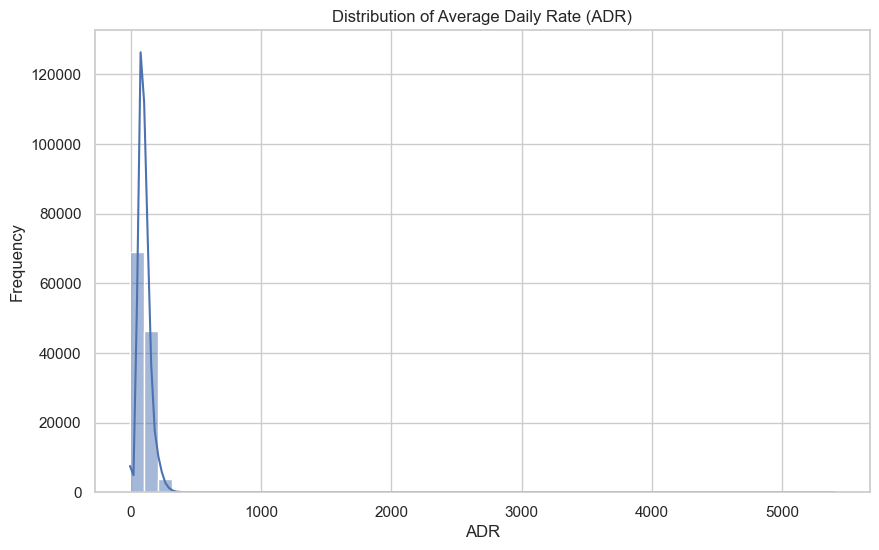

In [25]:
# Distribution of ADR (Average Daily Rate)
plt.figure(figsize=(10,6))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

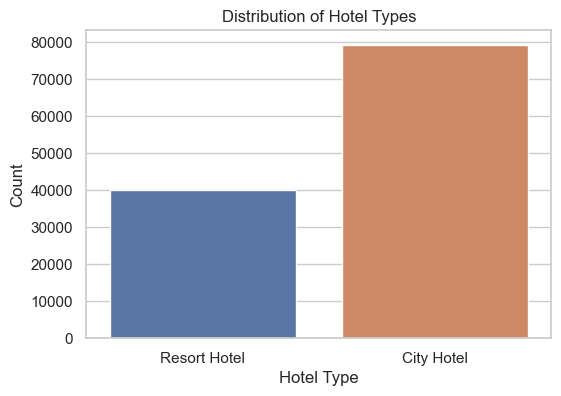

In [26]:
# Distribution of hotel types
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

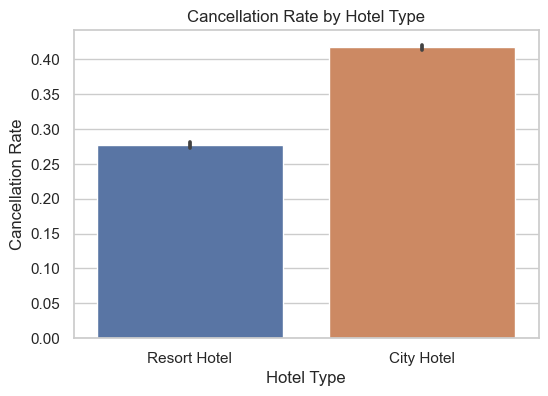

In [27]:
# Cancellation Rates by Hotel Type
plt.figure(figsize=(6,4))
sns.barplot(x='hotel', y='is_canceled', data=df)
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

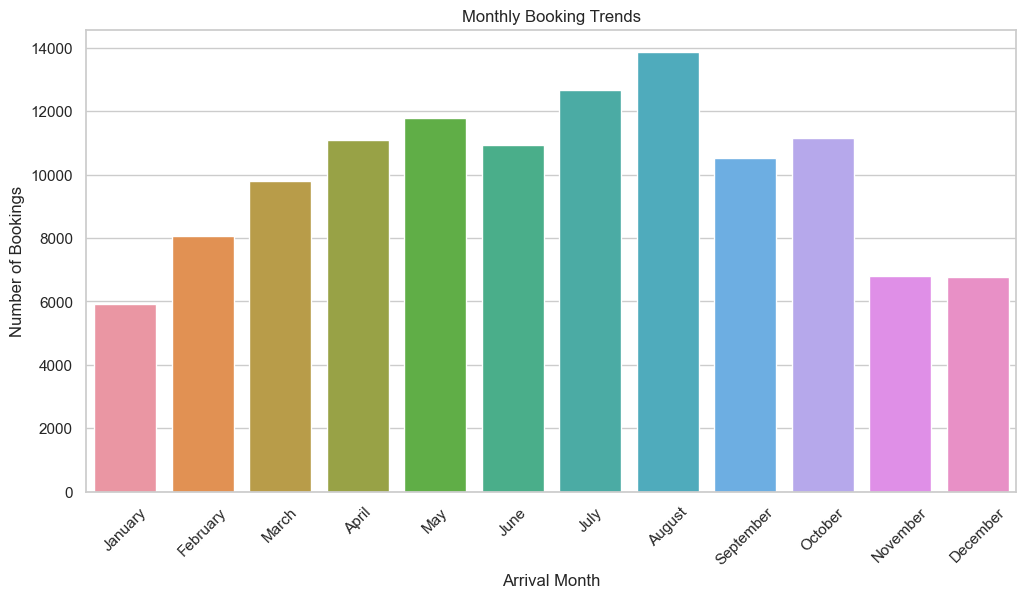

In [28]:
# Monthly Booking Trends

# Create a month column for ordering
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], 
                                          categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                      'July', 'August', 'September', 'October', 'November', 'December'], 
                                          ordered=True)

monthly_bookings = df.groupby('arrival_date_month')['hotel'].count().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_month', y='hotel', data=monthly_bookings)
plt.title('Monthly Booking Trends')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


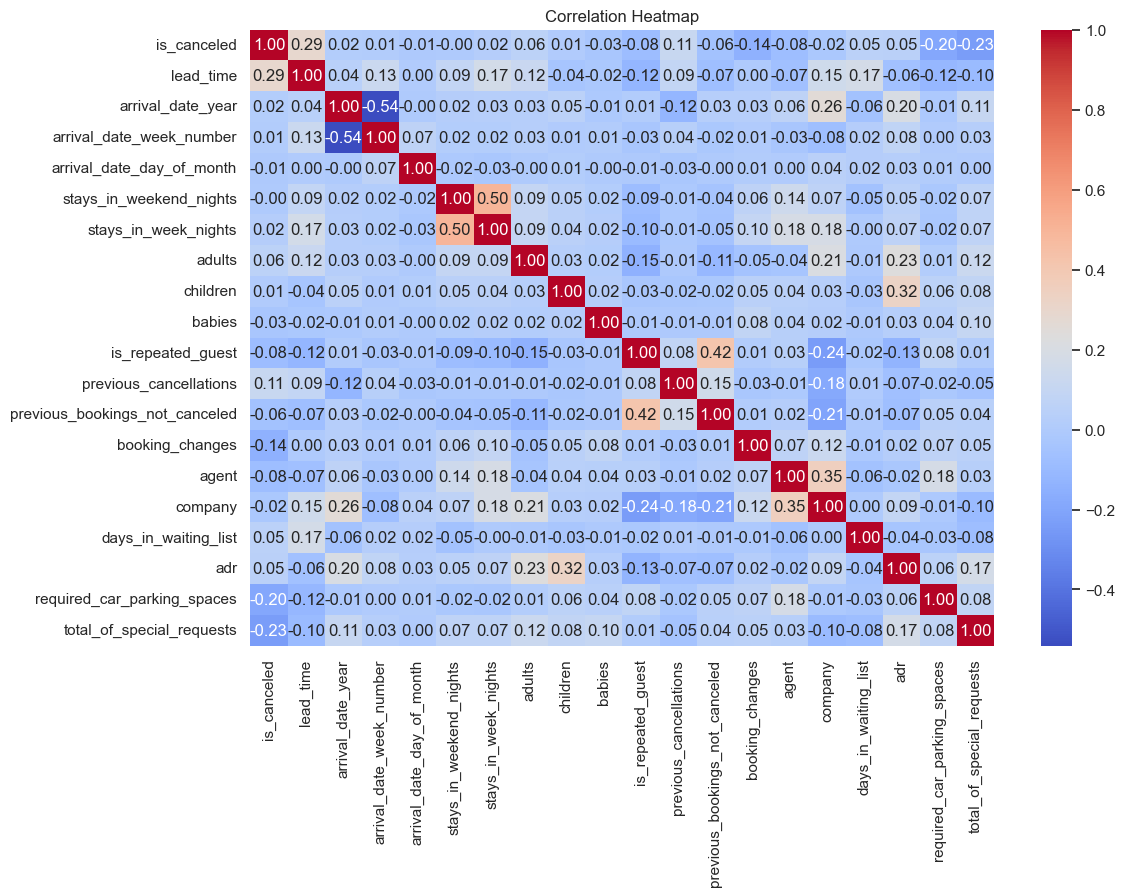

In [29]:
# Correlation Heatmap

# Select numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Create a Simulated Feature – Price Filter Segment

Create a new column: "price_segment" using the ADR value.

Define 3 price segments:
- "Budget": ADR < 100
- "Midrange": 100 ≤ ADR < 200
- "Luxury": ADR ≥ 200

In [19]:
def categorize_price(adr):
    if adr < 100:
        return "Budget"
    elif adr < 200:
        return "Midrange"
    else:
        return "Luxury"

df["price_segment"] = df["adr"].apply(categorize_price)

# Check the distribution
df["price_segment"].value_counts()

price_segment
Budget      66065
Midrange    48241
Luxury       5084
Name: count, dtype: int64

### User Segmentation and Impact Breakdown

We’ll segment users by:
- Hotel type (City Hotel vs Resort Hotel)
- Customer type (Transient, Group, etc.)
- Price segment (Budget, Midrange, Luxury)

Then analyze how these groups differ in:
- Average daily rate (ADR)
- Cancellation rate
- Booking lead time
- Stays (weekend and weekday nights)

In [20]:
# Grouping by hotel type and price segment
grouped = df.groupby(["hotel", "price_segment"]).agg({
    "adr": "mean",
    "is_canceled": "mean",
    "lead_time": "mean",
    "stays_in_weekend_nights": "mean",
    "stays_in_week_nights": "mean",
    "reservation_status": "count"
}).rename(columns={"reservation_status": "booking_count"})

# Reset index for readability
grouped = grouped.reset_index()

# Rename for clarity
grouped.columns = [
    "Hotel Type", "Price Segment", 
    "Avg Daily Rate", "Cancellation Rate", 
    "Avg Lead Time", "Avg Weekend Stays", 
    "Avg Weekday Stays", "Booking Count"
]

grouped.sort_values(["Hotel Type", "Price Segment"], inplace=True)
grouped

,Hotel Type,Price Segment,Avg Daily Rate,Cancellation Rate,Avg Lead Time,Avg Weekend Stays,Avg Weekday Stays,Booking Count
0,City Hotel,Budget,76.067287,0.417673,120.383479,0.787465,2.105576,39744
1,City Hotel,Luxury,233.175792,0.366887,56.411441,0.798130,2.265677,1818
2,City Hotel,Midrange,129.916104,0.419270,101.097702,0.803167,2.260406,37768
3,Resort Hotel,Budget,58.376104,0.252080,91.878728,1.113825,2.933095,26321
4,Resort Hotel,Luxury,239.386032,0.396509,82.479179,1.310472,3.485915,3266
5,Resort Hotel,Midrange,141.837310,0.304784,97.858398,1.343168,3.509023,10473


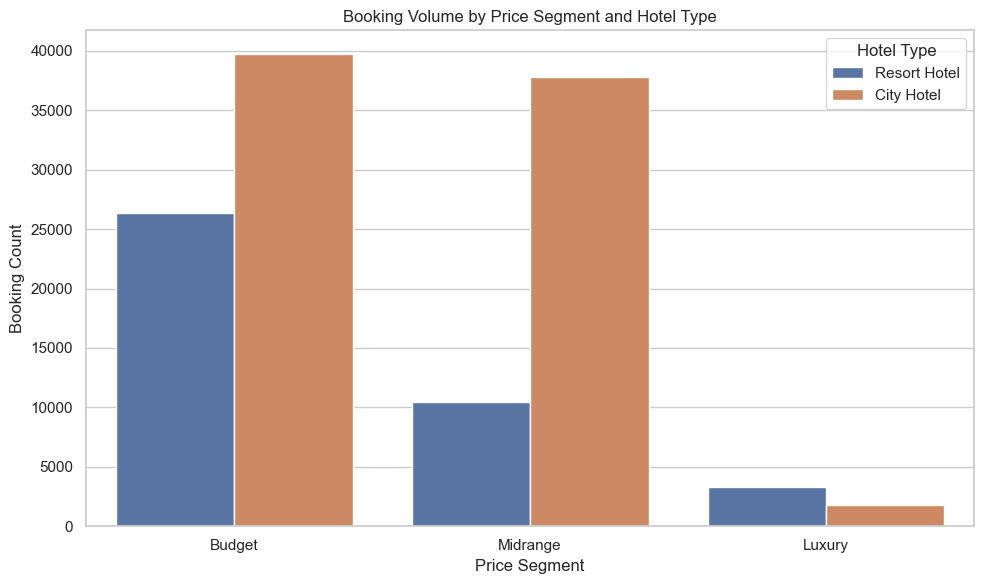

In [23]:
# Booking Distribution by Price Segment

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="price_segment", hue="hotel")
plt.title("Booking Volume by Price Segment and Hotel Type")
plt.xlabel("Price Segment")
plt.ylabel("Booking Count")
plt.legend(title="Hotel Type")
plt.tight_layout()
plt.show()

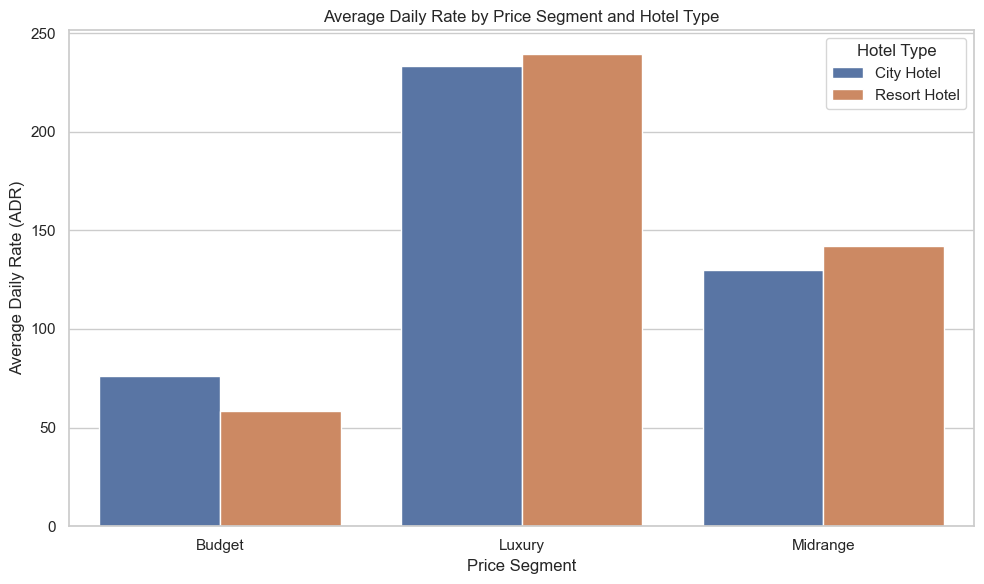

In [30]:
# Average Daily Rate by Segment

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x="Price Segment", y="Avg Daily Rate", hue="Hotel Type")
plt.title("Average Daily Rate by Price Segment and Hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.tight_layout()
plt.show()

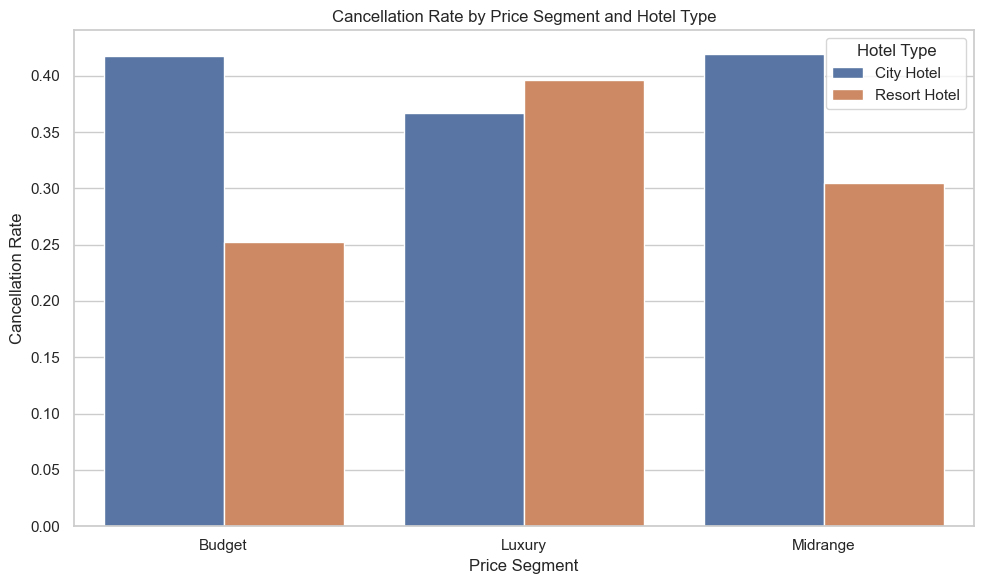

In [31]:
# Cancellation Rate by Segment

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x="Price Segment", y="Cancellation Rate", hue="Hotel Type")
plt.title("Cancellation Rate by Price Segment and Hotel Type")
plt.ylabel("Cancellation Rate")
plt.tight_layout()
plt.show()

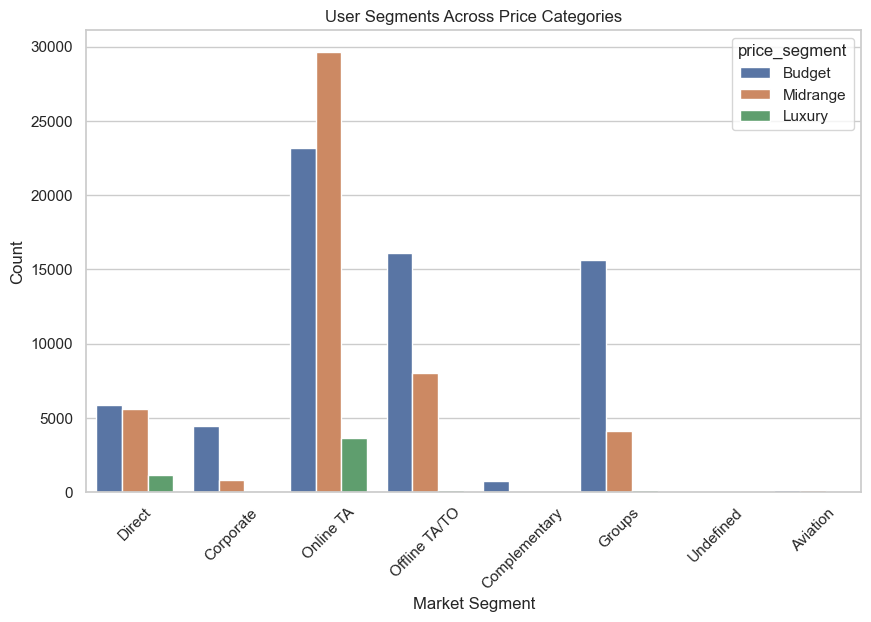

In [32]:
# Segment by market segment
plt.figure(figsize=(10,6))
sns.countplot(x='market_segment', hue='price_segment', data=df)
plt.title('User Segments Across Price Categories')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

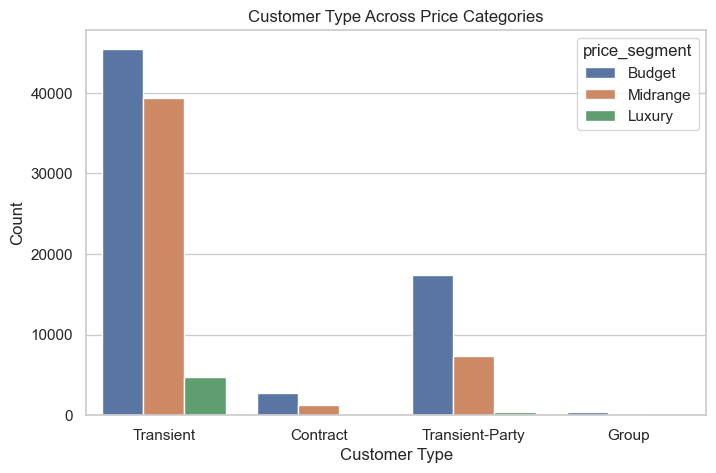

In [33]:
# Segment by customer type
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='price_segment', data=df)
plt.title('Customer Type Across Price Categories')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

### 🧠 Product Insights Summary: Price Filter Simulation
Based on the analysis of hotel bookings data segmented by average daily rate (ADR), we simulated the potential impact of adding a Price Filter feature (Budget, Midrange, Luxury) on user behavior. Here are the key takeaways:

- Resort hotels have more bookings in the **low** and **medium** price segments, while city hotels dominate the **medium** segment.
- Average Daily Rate (ADR) increases significantly from **low to high** segment, especially for resort hotels — indicating high price variance in that category.
- Cancellation rates are highest in the **low** price segment, especially for resort hotels. This suggests price-sensitive users are more likely to cancel.
-  Online TA (Travel Agency) is the most common booking channel across all price segments

### 🎯 Product Implications
- Implementing a price range filter can improve user experience by helping travelers quickly find affordable and reliable options.
- Defaulting to medium price filters might reduce cancellations and optimize conversion, especially for budget-conscious users.
- Resort hotels with higher prices may benefit from additional filters (e.g., free cancellation, amenities) to reduce booking drop-off.